# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
#load libraries we need

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [3]:
# Load pickled data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_original = train['features']  #needed later to compare with transforemd image
X_grey = train['features']

print("ok")

ok


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1] , np.shape(X_train)[2],  np.shape(X_train)[3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

32198
31
(32, 32, 3)


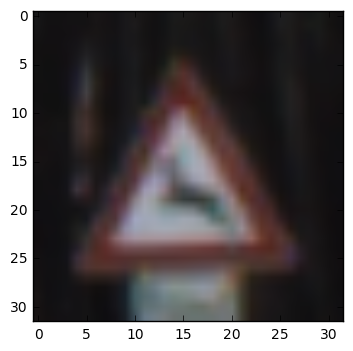

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


# Visualizations will be shown in the notebook.
%matplotlib inline

# I visualize here a random picture to get a feeling for how these images actually look like 

from random import randint
t = randint(0,n_train)
print (t)
img = X_train[t,:,:,:]
l = y_train[t,]
print (l)
print(np.shape(img))
plt.imshow(img)


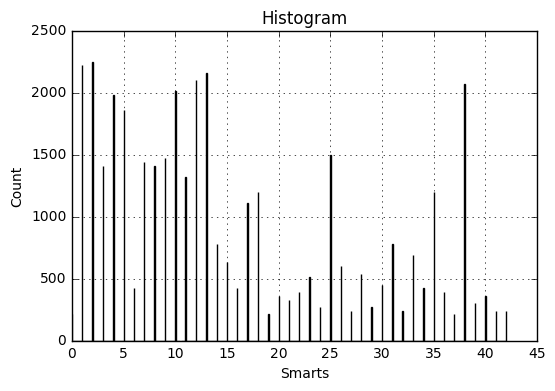

ok


In [6]:
# Create a histogram that shows the number of images per class

plt.hist(y_train, 1000)
plt.xlabel('Smarts')
plt.ylabel('Count')
plt.title(r'Histogram')
plt.grid(True)
plt.show()
print("ok")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train, X_grey, X_original = shuffle(X_train, y_train, X_grey, X_original)


In [8]:
# convert to grey

DO_GREYSCALE = True

#def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def to_gray_scale_and_histogram_optimized(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    equ = cv2.equalizeHist(img) #this is an attempt to make the images more similar in terms of contrast
    equ = cv2.cvtColor(equ,cv2.COLOR_GRAY2RGB)
    return equ

def to_gray_scale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    equ = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    return equ

if DO_GREYSCALE: 
    X_train_gray = X_train

    for i in range(0,n_train):
        X_train[i,:,:,:] = to_gray_scale_and_histogram_optimized(X_train[i,:,:,:])
        X_grey[i,:,:,:] = to_gray_scale(X_grey[i,:,:,:])

    # do the same withthe test examples

    for i in range(0,n_test):
        X_test[i,:,:,:] = to_gray_scale_and_histogram_optimized(X_test[i,:,:,:])

        
        
        
print('ok')

ok


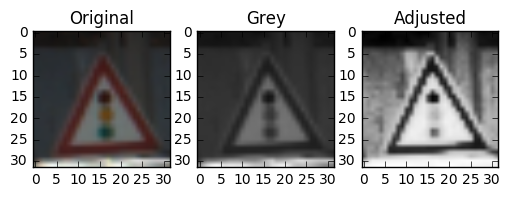

In [9]:
#visulize the effect of conversion to greyscale and then adjustment of contrast
# I chose random images

%matplotlib inline

k = 999

img_original = X_original[k,:,:,:]
img_grey = X_grey[k,:,:,:]
img_transformed = X_train[k,:,:,:]
    
    
fig = plt.figure()

a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(img_original)
a.set_title('Original')

a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(img_grey)
a.set_title('Grey')
 
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(img_transformed)
a.set_title('Adjusted')


In [10]:


# EPOCHS = 10
# BATCH_SIZE = 128
# this lead to maximum 0.88 accuracy

EPOCHS = 10
BATCH_SIZE = 1000
# lead to less accuracy thatn before 

# i read that smaller batch size tends to have better performance this leads then to Validation Accuracy = 0.966 
# and needs 2 minutes per epoch
EPOCHS = 5
BATCH_SIZE = 50

# trying smaller batch 
#EPOCHS = 1
#BATCH_SIZE = 50

print("ok...")

ok...


In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    outputs = 43
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, outputs), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(outputs))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("ok")

ok


In [12]:
outputs = 43
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
#x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, outputs)

print("ok")

ok


In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

#optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False, name='Adadelta')

training_operation = optimizer.minimize(loss_operation)

print("ok")

ok


In [14]:
# validation

# create validation set

from sklearn.utils import resample
X_validation, y_validation = resample(X_train, y_train, n_samples=1000, random_state=0)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


print("ok")

ok


In [15]:
#Train and check with validation set 

import datetime

print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        saver.save(sess, 'lenet')
        print("Model saved")
    
print("ok")

Timestamp: 2017-02-06 17:07:05
Training...

Timestamp: 2017-02-06 17:07:05
EPOCH 1 ...
Validation Accuracy = 0.794

Model saved
Timestamp: 2017-02-06 17:07:34
EPOCH 2 ...
Validation Accuracy = 0.862

Model saved
Timestamp: 2017-02-06 17:08:03
EPOCH 3 ...
Validation Accuracy = 0.917

Model saved
Timestamp: 2017-02-06 17:08:34
EPOCH 4 ...
Validation Accuracy = 0.943

Model saved
Timestamp: 2017-02-06 17:09:04
EPOCH 5 ...
Validation Accuracy = 0.955

Model saved
ok


In [16]:
#accuracy in color is 0.886
#accuracy in grey is 0.753

In [17]:
# evaluate


with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.844


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

signs = pd.read_csv('signnames.csv', delimiter=',', header = 0)

def get_sign_description(x):    
    #print('value in get_sign_description is ')
    #print(x)
    y = signs.loc[signs['ClassId'] == x, ['SignName']] 
    return y['SignName'].tolist()[0]

def get_index_of_example_sign(x):
    
    y_labels = pd.DataFrame(data=y_train[1:]) 
    y_labels.columns = ['label']
    return y_labels.loc[y_labels['label'] == x][0:1].index.tolist()[0] + 1

def print_both_images(predicted, real):
    
    img_predicted = X_train[get_index_of_example_sign(predicted),:,:,:]
    text_predicted = get_sign_description(predicted)
    #signs.loc[signs['ClassId'] == x, ['SignName']]    
    
    img_real = X_train[real,:,:,:]
    text_real = get_sign_description(y_train[real])
    
    fig = plt.figure()
    plt.subplots_adjust(left=1, right = 2)
    a=fig.add_subplot(1,2,1)
    imgplot = plt.imshow(img_predicted)
    a.set_title('Predicted: ' + text_predicted)
    #plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
    a=fig.add_subplot(1,2,2)
    imgplot = plt.imshow(img_real)
    #imgplot.set_clim(0.0,0.7)
    a.set_title('Real: ' + text_real)
    #plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation='horizontal')
    
print("ok")

ok


(1, 32, 32, 3)
PREDICTED value = 3,  Meaning = Speed limit (60km/h)
REAL value = 3,  Meaning = Speed limit (60km/h)


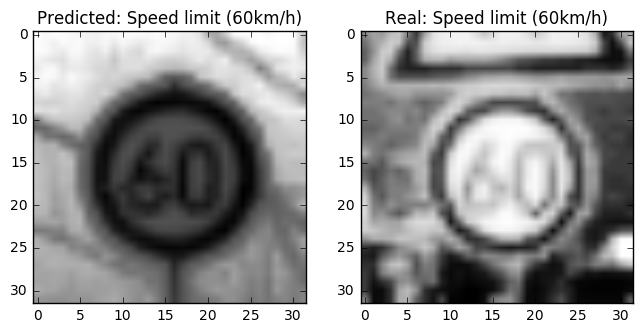

In [19]:
#predict inividual images chosen randomly 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction=tf.argmax(y,1)
    
    rnd = randint(0,n_train)  # chose a random image 
    test_image = X_train[rnd:rnd+1]
    print(test_image.shape)    
    y = tf.nn.softmax(logits)    
    prediction=tf.argmax(y,1)
    predicted = prediction.eval(feed_dict={x: test_image}, session=sess)[0]
    print("PREDICTED value = {:.0f}".format(predicted) + ',  Meaning = ' + get_sign_description(predicted))
    
    #print(get_sign_description(predicted))
    
    real = y_train[rnd,]
    #print(get_sign_description(real))
    print("REAL value = {:.0f}".format(real) + ',  Meaning = ' + get_sign_description(real))
    #get_index_of_sign(x)  
   
    
    print_both_images(predicted, rnd)
    

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

** IMPORTANT:**

*I did the project using a Lenovo x220 notebook and it seems it has not enough computing power to run a lot of epochs or larger batch sizes. AWS was not available to me during this period. So I had not other choice. Therefore I cannot assess the ultimate performance of my models as I had to stop training of the models at some point. The next projects I will do on better performing machines. *

I did two things in the area of preprocessing:

1. I extracted from the training set a evaluation set by chosing random samples. 

2. Based on an article I read (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) it seemed to me reasonable to convert the images to greyscale. I also thought it would be good to adjust the contrast of the images. I did both, but later on I realized that the model perofrmance did not increase. 


In addition to that I did a bit o exploratory analysis by visualizing a few images and by creating a historgram to show how many images we have of each class. It turns out that some classes have very few images. 
    
    




### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

To create a validation set I extracted 1000 samples from the training set using this code:

X_validation, y_validation = resample(X_train, y_train, n_samples=1000, random_state=0)

I was reflecting about a different approach: 

We know that some of the classes do have verz littel images. It would be possible to merge the training and the test set to have a larger bases and then extract a smaller test set. However, I did not try this out because I think such a approach is not in focus of the project. 

I did not generate additional data. The reason is this: I looked at a lot of images of the test set and see a lot if diversity. I therefore considered that it would not braing any further value to generate more images. 


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture follow the LeNet architecture. The steps in the network are

1. Convlution Layer
2. Activation Function Relu
3. Pooling
4. Convolution Layer II
5. Activation Function Relu
6. Pooling
7. Flatten from 2-dimensional array to 1-dimensional
8. Neural network layer, fully connected
9. Activation Relu
10. Neural network Layer. From 120 to 84
11. Activation function
12. Neural network layer, fully connected, from 84 to the final 43 output 



There are however better architectures than the one chosen. Lenet is relatively old and in the meantime better architectures apprared. Examples are

* Resnet
* Inception

I particular Resnet is interesteding. A performance comparison is shown here: 

* Various Architectures compared:  https://culurciello.github.io/tech/2016/06/04/nets.html 
* An Analysis of Deep Neural Network Models for Practical Applications https://arxiv.org/pdf/1605.07678v2.pdf 

And a implementation fo Resnet can be found here: https://github.com/wenxinxu/resnet-in-tensorflow

However, I did not implement them here in the prject for two reasons:

* I am not sure if it is required for this project
* I feel myself not strong enough right now in Tensorflow


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained the model with the given training set. 

And the optimizer is the Adam Optimizer

More optimizers here  https://www.tensorflow.org/api_docs/python/train/optimizers#AdamOptimizer 

And a comparison of oiptimizers here: http://sebastianruder.com/optimizing-gradient-descent/

I then used Adadelta optimizer because in the mentioned research paper  it is shown that it performs very well. 

tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False, name='Adadelta')

However, when I tested it the accuracy was extremely bad. it might be that I did not enough epochs/batches, but as said, I dont have right now the computing power and so i switched back to the Adam Optimizer. 




### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Well, I have to admit that this is the first time ever that I deal with neural networks and CNN etc. As the whole topic is new to me I took this approach: 

1. use the material given by udacity
2. tweak it where needed
3. add additional functions where needed
4. Try out modifications of parameters to see if model perofrmance increaed

1-3 of this was OK, but it took me a lot of time and I clearly see I need to study harder. 

Step 4 is problematic because it takes a lot of time. I need better computing power first before I really can do optimization in a acceptable timeframe. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
#helper function to display the extra images

def print_extra_images(predicted_class, real_image, real_image_file_name):
    
    x = len(predicted_class)
    
    #ig = plt.figure()  
    fig = plt.figure(figsize=(10, 10))
    plt.subplots_adjust(top=2)
    
    img_loc = 0
    
    for i in range(0, x):
        
        img_predicted = X_train[get_index_of_example_sign(predicted_class[i]),:,:,:]
        text_predicted = get_sign_description(predicted_class[i]) 
        img_real = real_image[i]
        text_real = real_image_file_name  [i]  
              
        img_loc += 1    
    
        a=fig.add_subplot(5,2,img_loc)
        imgplot = plt.imshow(img_predicted)
        a.set_title('Predicted: ' + text_predicted)   
        
        img_loc += 1 
    
        a=fig.add_subplot(5,2,img_loc)
        imgplot = plt.imshow(img_real)    
        a.set_title('Tested image: ' + text_real)
        

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer (code):**

(1, 32, 32, 3)
PREDICTED value = 23,  Meaning = Slippery road
(1, 32, 32, 3)
PREDICTED value = 25,  Meaning = Road work
(1, 32, 32, 3)
PREDICTED value = 42,  Meaning = End of no passing by vehicles over 3.5 metric tons
(1, 32, 32, 3)
PREDICTED value = 25,  Meaning = Road work
(1, 32, 32, 3)
PREDICTED value = 9,  Meaning = No passing


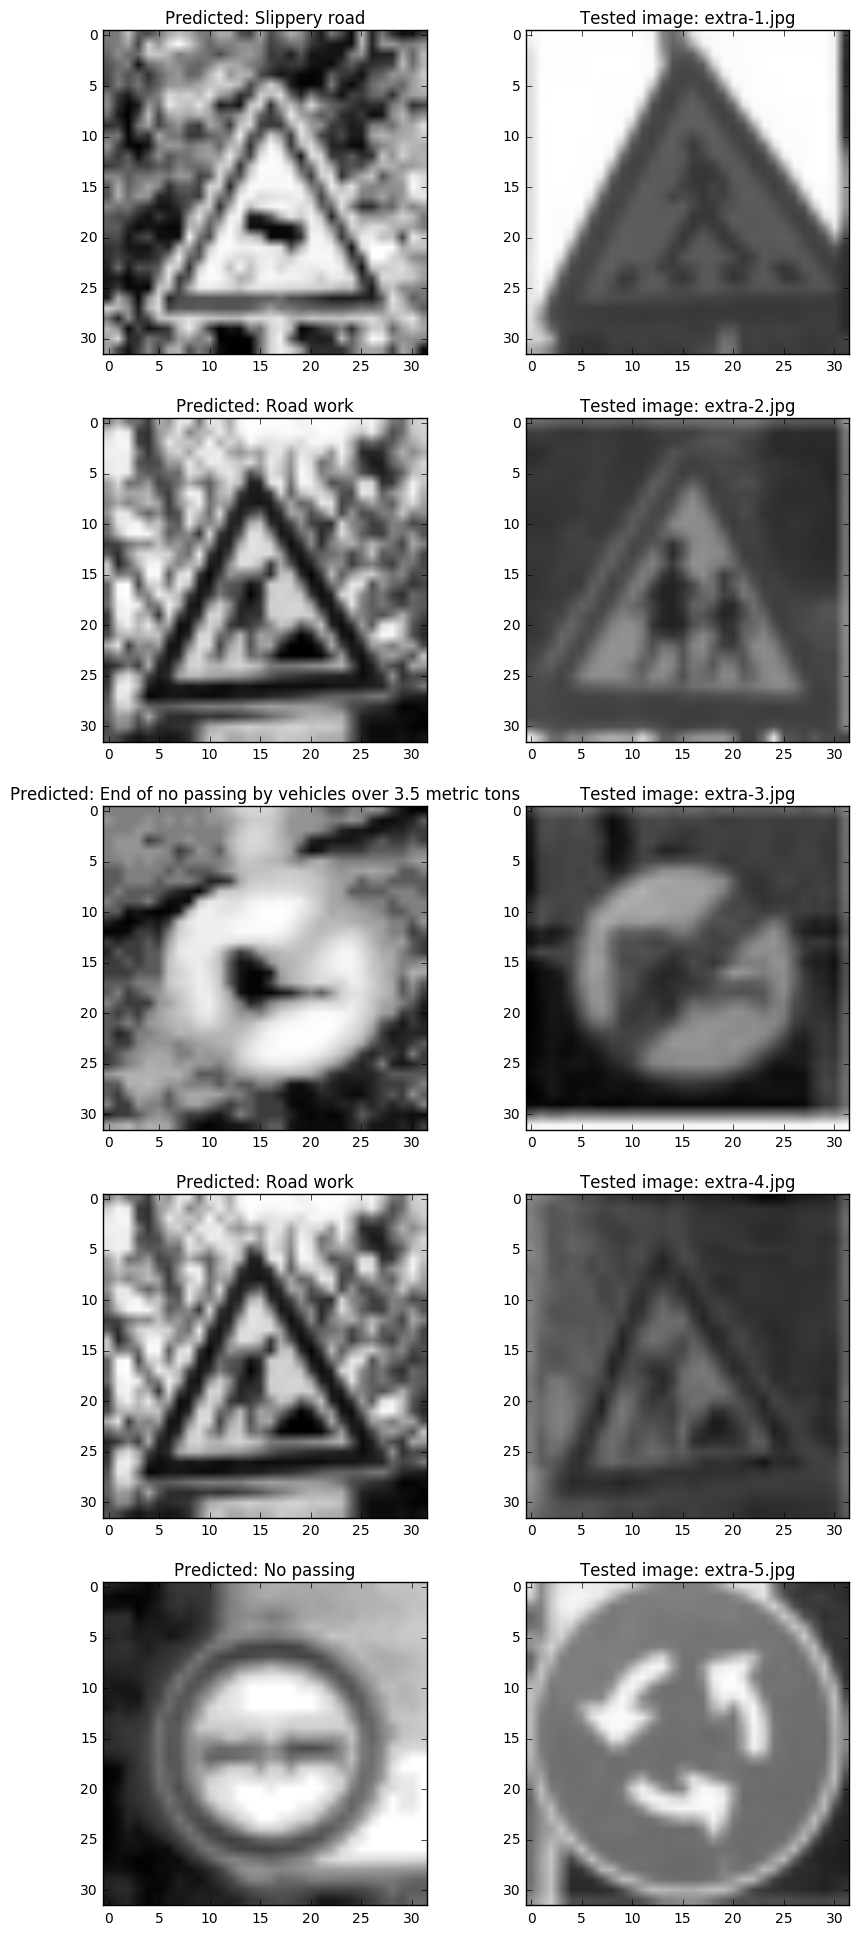

In [21]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#load the images

extra = []
extra_names = []

for i in range(1, 6):
    #print(i)
    image_name = "extra-" + str(i) + ".jpg"
    #resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img = cv2.imread(image_name,1)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA) 
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    equ = cv2.equalizeHist(img)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)    
    extra.append(img)
    extra_names.append(image_name)

    
#now we have the images in an array and can predict them  

predicted_class_extra = []

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction=tf.argmax(y,1)
    
    for img in extra:
        img = np.expand_dims(img, 0)    
        test_image = img
        print(test_image.shape)    
        y = tf.nn.softmax(logits)    
        prediction=tf.argmax(y,1)
        predicted = prediction.eval(feed_dict={x: test_image}, session=sess)[0]
        print("PREDICTED value = {:.0f}".format(predicted) + ',  Meaning = ' + get_sign_description(predicted))
        predicted_class_extra.append(predicted)
    
print_extra_images(predicted_class_extra, extra, extra_names)

0


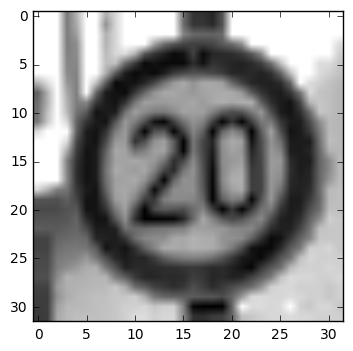

1


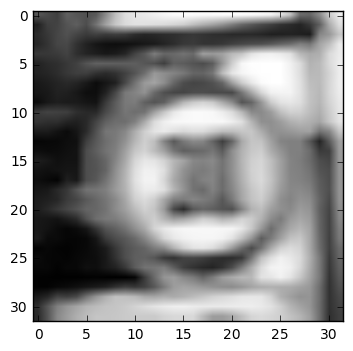

2


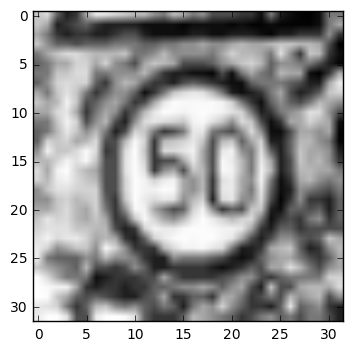

3


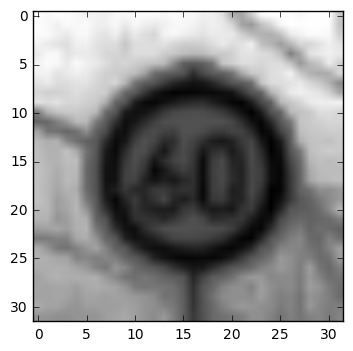

4


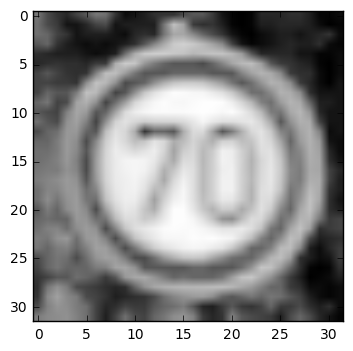

5


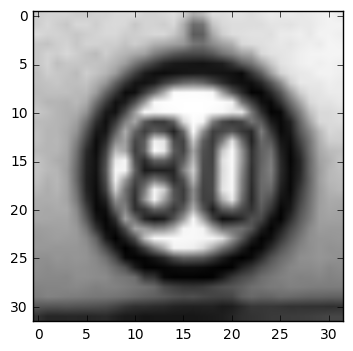

6


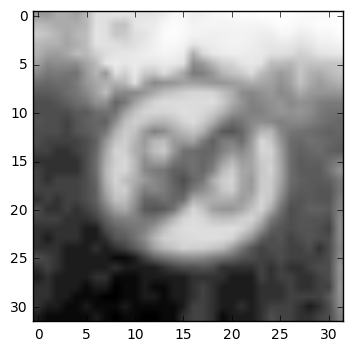

7


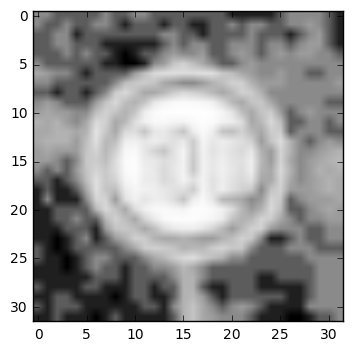

8


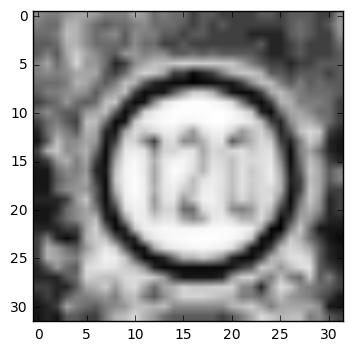

9


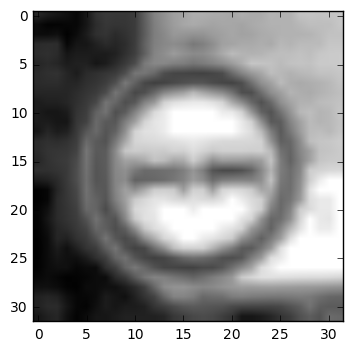

10


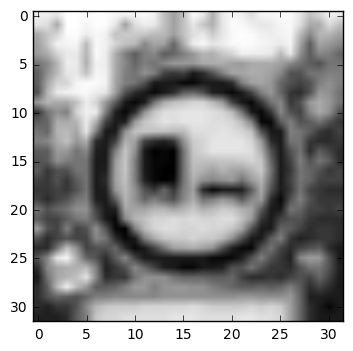

11


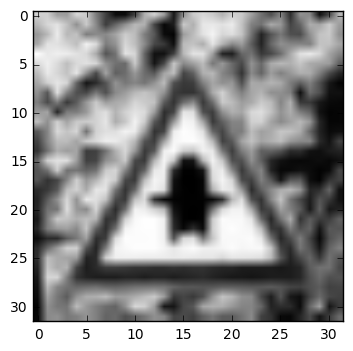

12


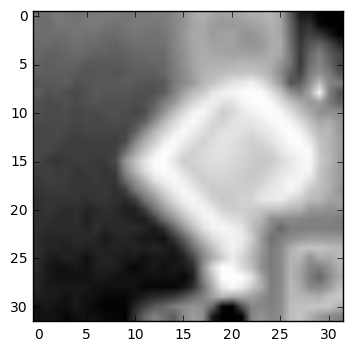

13


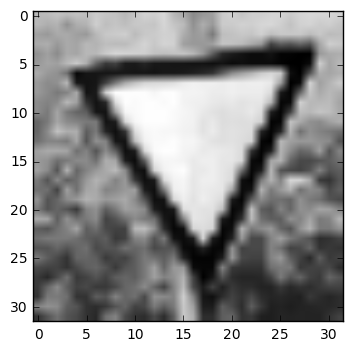

14


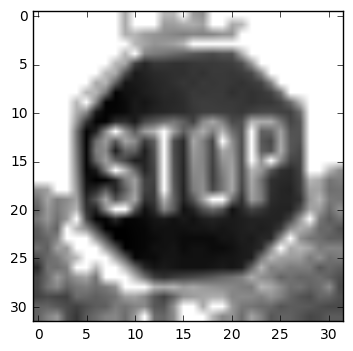

15


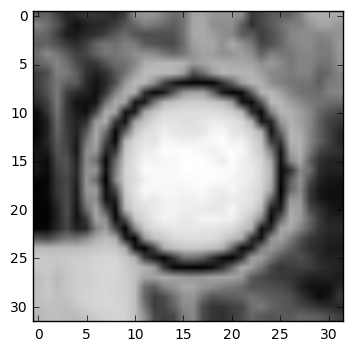

16


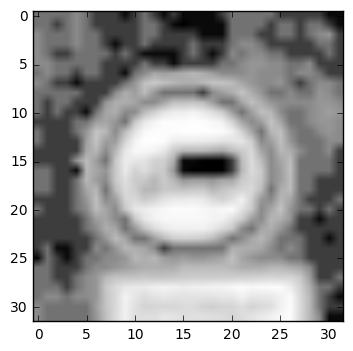

17


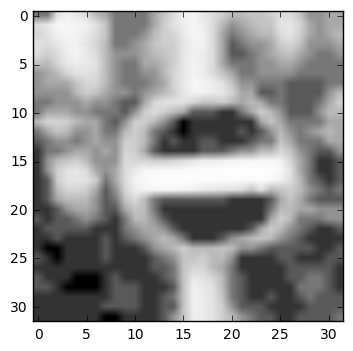

18


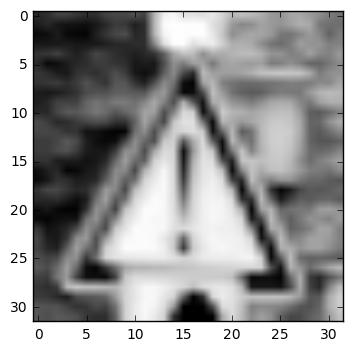

19


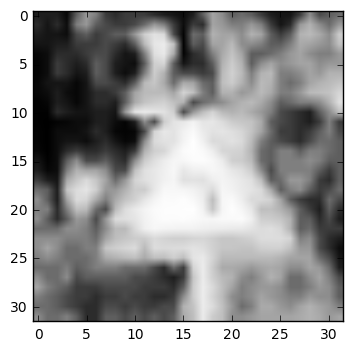

20


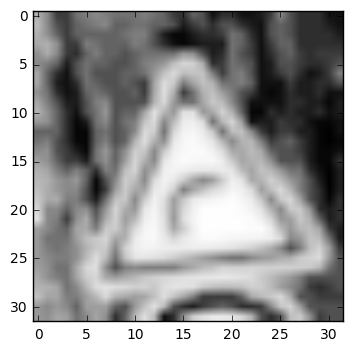

21


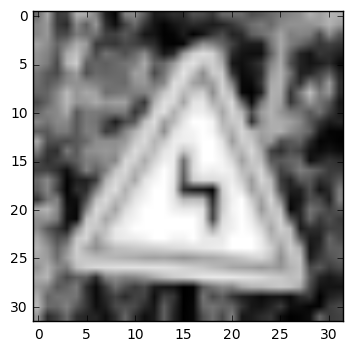

22


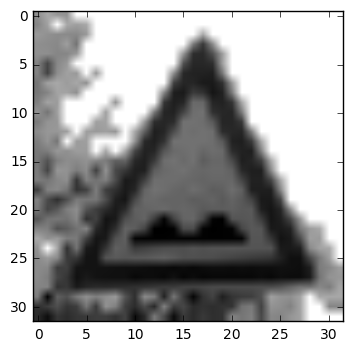

23


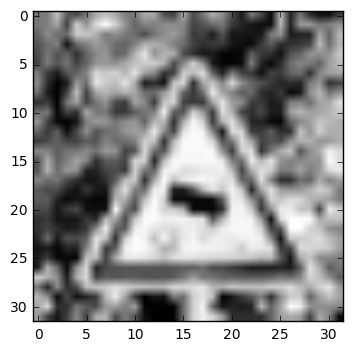

24


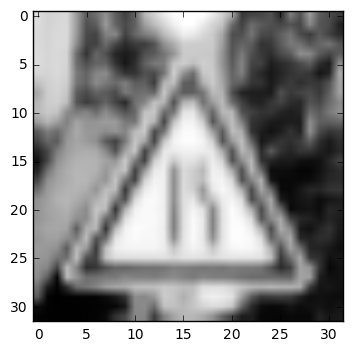

25


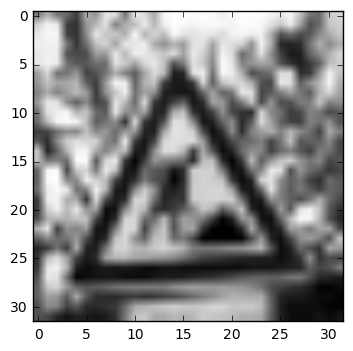

26


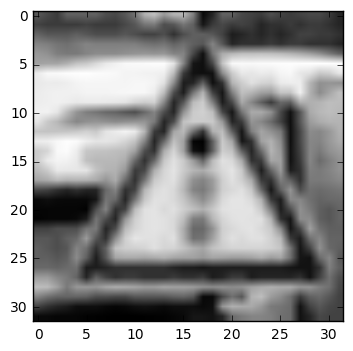

27


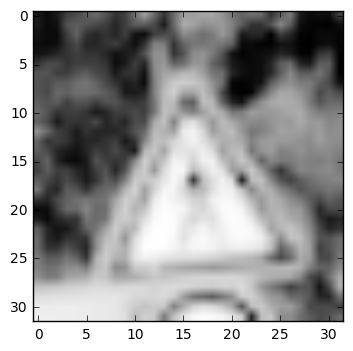

28


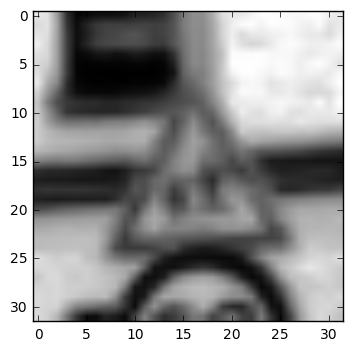

29


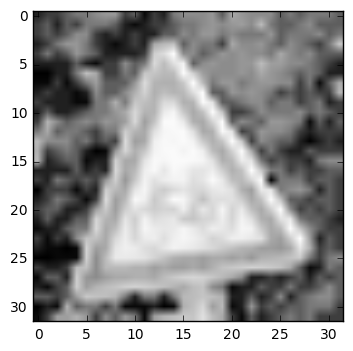

30


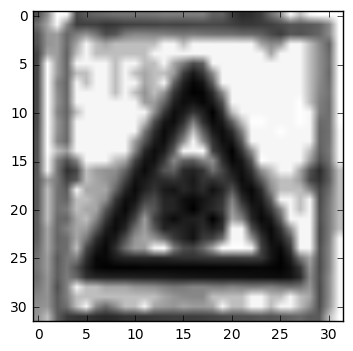

31


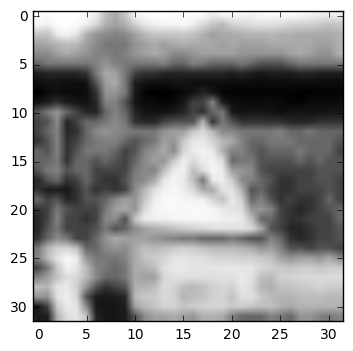

32


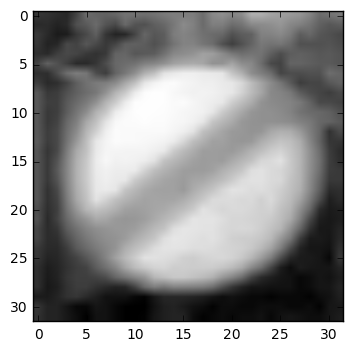

33


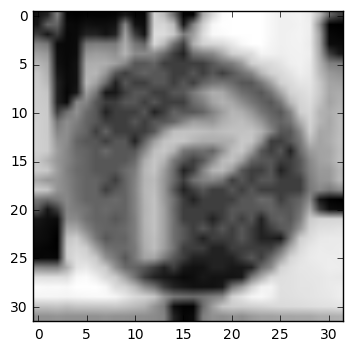

34


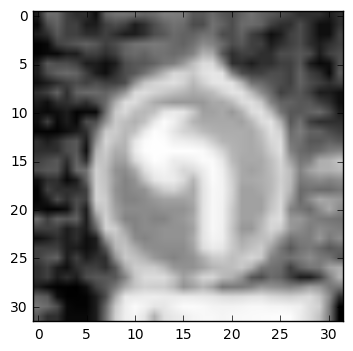

35


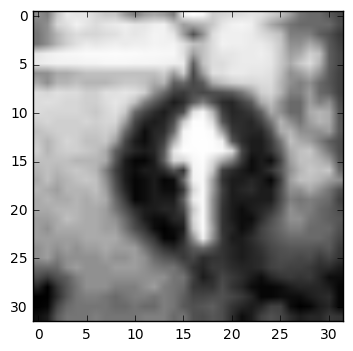

36


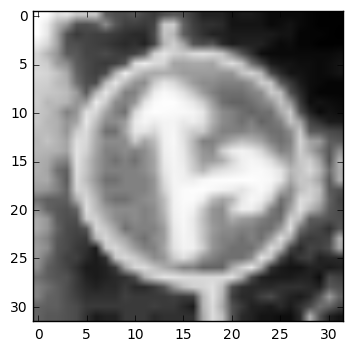

37


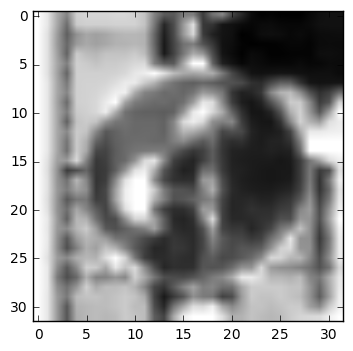

38


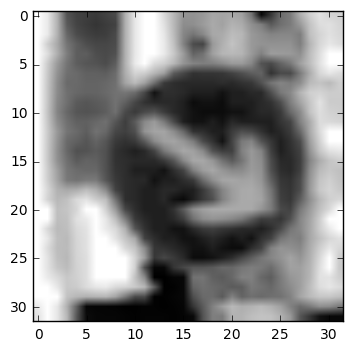

39


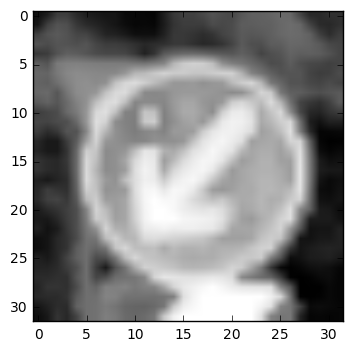

40


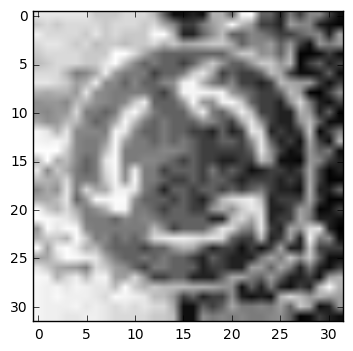

41


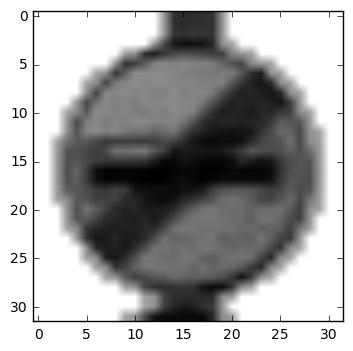

42


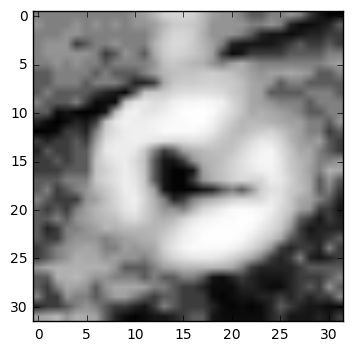

In [40]:
# test print out of examples for all 43 signs

for i in range(0,43):
    print(i)
    img_predicted = X_train[get_index_of_example_sign(i),:,:,:]
    plt.imshow(img_predicted)
    plt.show()

**Answer:**

From the 5 extra images only two were classified correctly. The question is why. Some explanations to the various images:  

1. **The zebra crossing was classified as slippery road: ** This might be due to the fact that the traing set does not include a zebra crossing. The algorithm then uses the similar shape with highest probablity and this might be the shape of the slippery road sign. 

2. **The crossing children were classified as road work: **The training set does include the sign for crossing children. However, there are many different versions of this sign - see also here: https://www.google.com.ua/search?q=traffic+sign+children+crossing&client=ubuntu&espv=2&biw=1366&bih=599&tbm=isch&tbo=u&source=univ&sa=X&ved=0ahUKEwim54DL5PvRAhXqHJoKHUrtCo8QsAQIFw The sign I have chosen looks slightly different from some of the training images. In the above shown visualization of all 42 signs we can see that the shape of the children on the sign is different from the shape of the extra image. 

3. **Roundabout was classified as no passing: **The training set does include a sign for roundabout (class 40). However, the example that I used looks different. In my exampel the arrows are larger and allocated more towards the center of the sign. In the trainign set the arrows are thinner and closer to the border or the sign. 





### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model performs much worse on the extra images than on the test dataset. On the extra images 3 out of 5 images were classified wrong. However, we have to consider the fact that one image could not be classified correctly because the image does not exist in the set of classes. So we actually have 4 images that could have been classified correctly but only in 2 cases this happened. So, the accuracy is 50% compared to an accuracy of >90% on the test dataset. Therefore we can say that the model performs much worse on extra images. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [33]:
# extract certainty with tf.nn.top_k

# NOTE: the variabe test_image is the last image in the previous cells. usually it is the image of the roundabout. 

exatra_images_classes = {}
exatra_images_probabilities = {}

with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.')) 
    topFive=tf.nn.top_k(logits, k=5, sorted=True, name=None)
    print(topFive)
    
    i = 1
    
    for img in extra:
        img = np.expand_dims(img, 0)    
        test_image = img
        
        image_name = "extra-" + str(i) + ".jpg"
        i += 1
        
        print('==================== ' + image_name + ' ==================== ')        
        top5_prob, top5_cls = sess.run([y, topFive], feed_dict = {x: test_image})
        print('-------------------------------------')
        # top 5 probabilities
        print(top5_prob)
        print('-------------------------------------')
        # top 5 class ids
        print(top5_cls)
        exatra_images_classes[image_name] = top5_cls
        exatra_images_probabilities[image_name] = top5_prob
        


TopKV2(values=<tf.Tensor 'TopKV2_1:0' shape=(?, 5) dtype=float32>, indices=<tf.Tensor 'TopKV2_1:1' shape=(?, 5) dtype=int32>)
==================== extra-1.jpg ==================== 
-------------------------------------
[[  1.58330749e-06   1.50538035e-04   1.64556386e-05   2.08448768e-02
    2.24985415e-03   3.20723541e-02   2.89623325e-10   1.03829705e-04
    6.23165106e-05   7.30310520e-03   8.08194363e-06   1.90550624e-03
    3.05523645e-06   3.27336529e-05   7.64891956e-06   3.94314353e-04
    1.50641574e-06   4.89368613e-05   6.15598261e-02   1.23866431e-01
    9.08587303e-04   3.26042972e-03   1.83731081e-05   3.93720120e-01
    3.95825133e-02   2.17443258e-02   6.01450913e-04   1.00884361e-04
    2.88448459e-03   8.45575426e-03   1.18924130e-03   2.44941518e-01
    1.29748389e-06   1.57557670e-02   3.27538068e-08   1.46039082e-02
    2.60270281e-05   3.10320729e-06   2.13676503e-06   1.52310007e-03
    4.39635478e-05   1.75342393e-10   5.63216529e-10]]
--------------------------

In [34]:

i = 1

for img in extra:
    
    image_name = "extra-" + str(i) + ".jpg"
    i += 1
    print('==================== ' + image_name + ' ==================== ')
    top5_cls = exatra_images_classes[image_name]

    print(top5_cls[0])
    print('-------------------------------------')
    print(top5_cls[0][0,1])
    print('-------------------------------------')
    print(top5_cls[1])
    print('-------------------------------------')
    print(top5_cls[1][0,1])

==================== extra-1.jpg ==================== 
[[ 6.22817326  5.75355244  5.07173681  4.37254238  3.93092036]]
-------------------------------------
5.75355
-------------------------------------
[[23 31 19 18 24]]
-------------------------------------
31
==================== extra-2.jpg ==================== 
[[ 7.83504248  4.10520172  3.95155668  3.92939472  3.57838988]]
-------------------------------------
4.1052
-------------------------------------
[[25  7 33 12 31]]
-------------------------------------
7
==================== extra-3.jpg ==================== 
[[ 20.14281273  15.31381035  13.48615551  11.82830906   6.56427526]]
-------------------------------------
15.3138
-------------------------------------
[[42 32 41  6  5]]
-------------------------------------
32
==================== extra-4.jpg ==================== 
[[ 7.40915728  4.60385656  2.95231891  2.80847549  1.86311293]]
-------------------------------------
4.60386
-------------------------------------
[[25 

==================== extra-1.jpg ==================== 


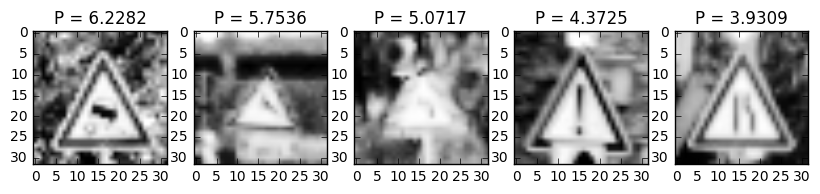

==================== extra-2.jpg ==================== 


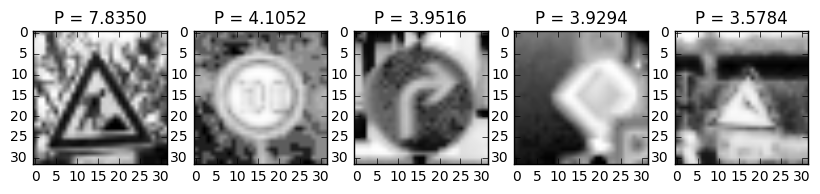

==================== extra-3.jpg ==================== 


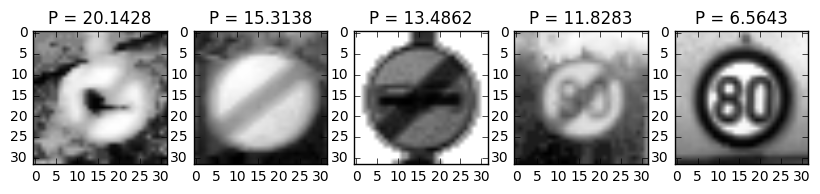

==================== extra-4.jpg ==================== 


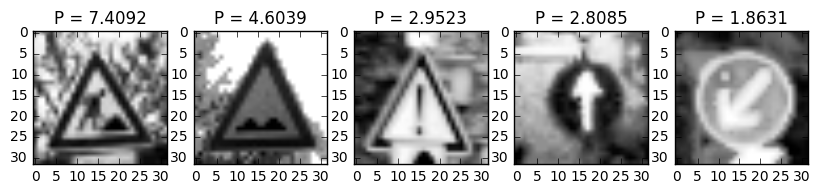

==================== extra-5.jpg ==================== 


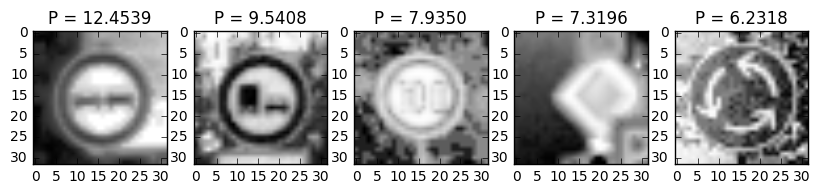

In [37]:

#this code shows examples of the five top classes predicted. In other words: We gave teh algorithm an image of a roundabout. And
# now we see what the algorithm predicts. it predicts the classes [40 18 12 20 10] but wht does this mean? 
# Therefore I visualized them using the iamges of our training set.
# Result: The algorithm correctly predicted that the image shows a roundabout, but the second highest probability showed that 
# it is a traffic sign that does not resemble at all with a roundabout... this is strange 


def print_top5_images(classes, probabilities):
    
    i = []
            
    fig = plt.figure(figsize=(10, 10))
    
    
    for e in range(0,5):    
        #print(e)
        v = classes[0,e]        
        i.append(X_train[get_index_of_example_sign(v),:,:,:])        
        a=fig.add_subplot(1,5,e+1)
        imgplot = plt.imshow(i[e])
        t = "P = {:.4f}".format(probabilities[0,e])
        a.set_title(t)
        #plt.imshow(img_predicted)
    plt.show()
        
        
i = 1

for img in extra:
    
    image_name = "extra-" + str(i) + ".jpg"
    i += 1
    print('==================== ' + image_name + ' ==================== ')
    top5_cls = exatra_images_classes[image_name]
    
    print_top5_images(top5_cls[1], top5_cls[0])

==================== extra-1.jpg ==================== 


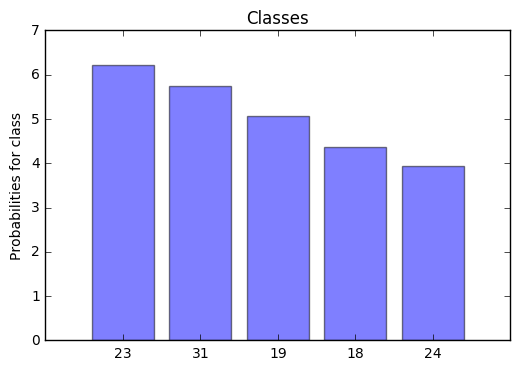

==================== extra-2.jpg ==================== 


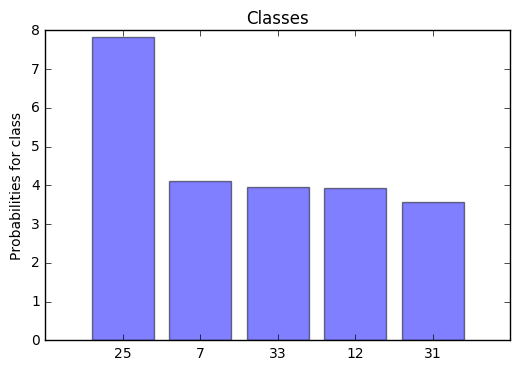

==================== extra-3.jpg ==================== 


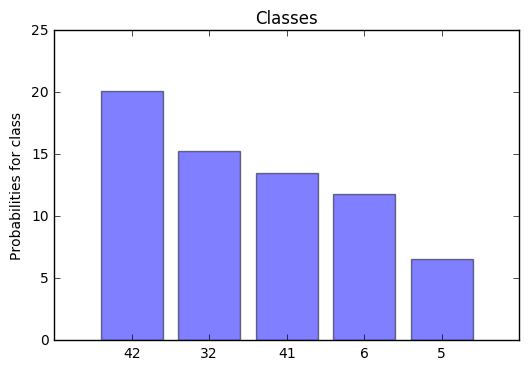

==================== extra-4.jpg ==================== 


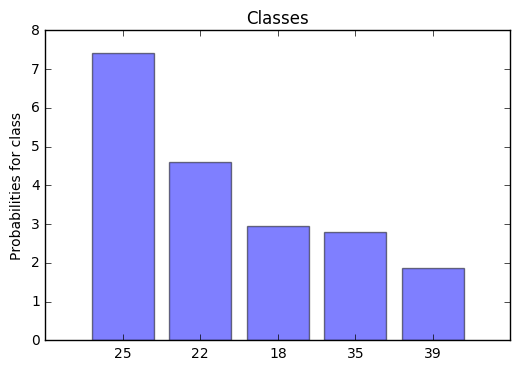

==================== extra-5.jpg ==================== 


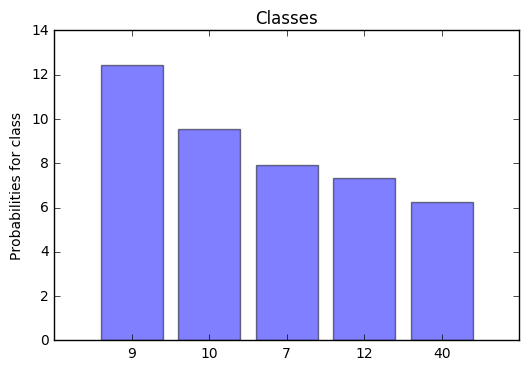

In [39]:
# vsualize the probabilities with bar chart

i = 1

for img in extra:
    
    image_name = "extra-" + str(i) + ".jpg"
    i += 1
    print('==================== ' + image_name + ' ==================== ')
    top5_cls = exatra_images_classes[image_name]

    x_bars = top5_cls[1][0,]
    y_pos = np.arange(len(top5_cls[0][0,]))
    performance = top5_cls[0][0,]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, x_bars)
    plt.ylabel('Probabilities for class')
    plt.title('Classes')

    plt.show()

***Answer / conclusion: ***

1. **Extra image 1 which was not predicted correctly: ** The prediction algorithm is not very certain about its prediction. Furthermore, none of the predictions include the correct class. The correct class would be a zebra crossing. 

2. **Extra image 2 which was not predicted correctly: **The correct prediction would be class 28 - children crossing. However, this class is not included in any of the top 5 predictions

3. **Extra image 3 which was not predicted correctly: **The correct prediction would have been a roundabout. The roundabout is included in the top 5 predictions. However, it is the one with the lowes probablitiy. 

4. **Other extra images: **the other two extra images were predicted correctly. 

5. **Other observations: **The incorrect prediction for image 2 is particularly interesting, because the algorithm seems to be pretty sure about its prediction because the highest probability for this class is much higher than for the other classes. Despite this fact, the prediction is wrong. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.